### Simple plot of the 10-year histircal data for the bundle of stocks and ETF. (Plot is trained to go only to one year prior, in order to gauge our predictions agains real data.)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


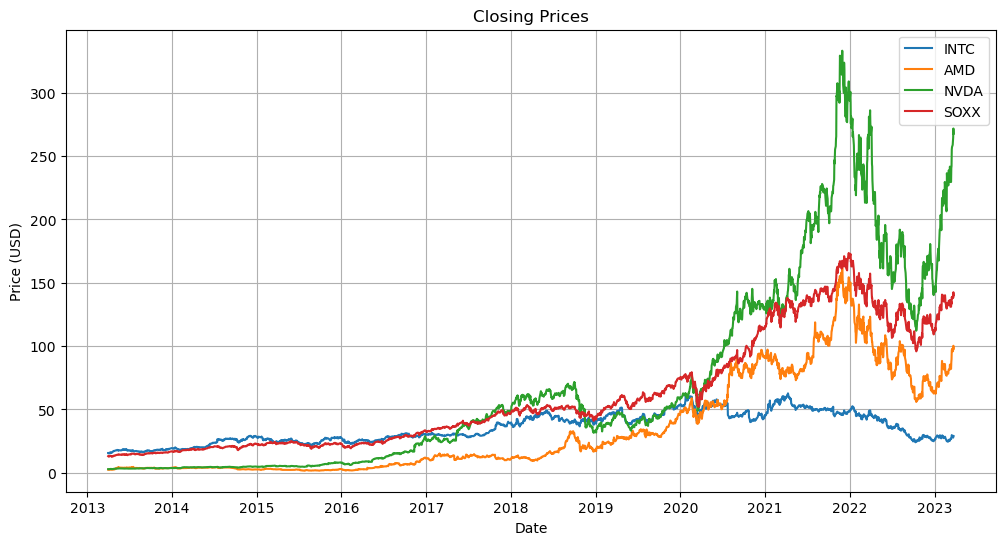

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the stock tickers including the ETF ticker (SOXX)
tickers = ['INTC', 'AMD', 'NVDA', 'SOXX']

# Calculate the end date as one year ago from today
end_date = datetime.now() - timedelta(days=365)
# Calculate the start date as ten years prior to the end date
start_date = end_date - timedelta(days=10*365)

# Create an empty list to store the dataframes
dfs = []

# Fetch historical data for each stock and append to the list
for ticker in tickers:
    if ticker != 'SOXX':  # Exclude ETF ticker from yfinance fetch
        data = yf.download(ticker, start=start_date, end=end_date)
    else:
        data = yf.download(ticker, start=start_date, end=end_date, actions=False)
    data['Ticker'] = ticker  # Add a column for the ticker symbol
    dfs.append(data)

# Concatenate the dataframes into a single dataframe
all_data = pd.concat(dfs)

# Plot the closing prices
plt.figure(figsize=(12, 6))

for ticker in tickers:
    plt.plot(all_data[all_data['Ticker'] == ticker].index, 
             all_data[all_data['Ticker'] == ticker]['Adj Close'], 
             label=ticker)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()